In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

2025-07-07 13:19:51.873016: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2025-07-07 13:19:51.903272: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2025-07-07 13:19:51.904244: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-07-07 13:19:52.488926: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
dataset = pd.read_csv("/home/mbc/thesissatria/Dataset/CICIoT2023 rows 1814248_1%, 3%, 4%, 80%, 80%, 90%, 90%, 90%, 100%.csv")

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1814248 entries, 0 to 1814247
Data columns (total 47 columns):
 #   Column           Dtype  
---  ------           -----  
 0   flow_duration    float64
 1   Header_Length    float64
 2   Protocol Type    float64
 3   Duration         float64
 4   Rate             float64
 5   Srate            float64
 6   Drate            float64
 7   fin_flag_number  float64
 8   syn_flag_number  float64
 9   rst_flag_number  float64
 10  psh_flag_number  float64
 11  ack_flag_number  float64
 12  ece_flag_number  float64
 13  cwr_flag_number  float64
 14  ack_count        float64
 15  syn_count        float64
 16  fin_count        float64
 17  urg_count        float64
 18  rst_count        float64
 19  HTTP             float64
 20  HTTPS            float64
 21  DNS              float64
 22  Telnet           float64
 23  SMTP             float64
 24  SSH              float64
 25  IRC              float64
 26  TCP              float64
 27  UDP         

In [4]:
print("Ukuran Dataset Sebelum Drop Duplikat dan Missing Value:")
dataset.shape

Ukuran Dataset Sebelum Drop Duplikat dan Missing Value:


(1814248, 47)

In [5]:
dups = dataset[dataset.duplicated()]
print(f'Jumlah Duplikat: {len(dups)}')

Jumlah Duplikat: 0


In [6]:
missing_val = dataset.isna().sum()
print(missing_val.loc[missing_val > 0])

numeric_cols = dataset.select_dtypes(include = np.number).columns
inf_count = np.isinf(dataset[numeric_cols]).sum()
print(inf_count[inf_count > 0])

print(f'Nilai Hilang {dataset.isna().sum().sum()}')

Series([], dtype: int64)
Series([], dtype: int64)
Nilai Hilang 0


In [7]:
print("Ukuran Dataset Sesudah Drop Duplikat:")
dataset.drop_duplicates(inplace = True)
dataset.shape

Ukuran Dataset Sesudah Drop Duplikat:


(1814248, 47)

In [8]:
dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
flow_duration,1814248.0,1.257373e+01,4.937465e+02,0.000000,0.000000e+00,2.551759e-02,5.299654e-01,3.943572e+05
Header_Length,1814248.0,1.462844e+05,6.451674e+05,0.000000,5.400000e+01,9.072000e+01,1.876712e+04,9.831137e+06
Protocol Type,1814248.0,1.068434e+01,9.871086e+00,0.000000,6.000000e+00,6.000000e+00,1.689000e+01,4.700000e+01
Duration,1814248.0,6.883188e+01,2.043391e+01,0.000000,6.400000e+01,6.400000e+01,6.400000e+01,2.550000e+02
Rate,1814248.0,7.974801e+03,8.151407e+04,0.000000,2.335587e+00,2.022121e+01,7.448883e+02,8.388608e+06
Srate,1814248.0,7.974801e+03,8.151407e+04,0.000000,2.335587e+00,2.022121e+01,7.448883e+02,8.388608e+06
Drate,1814248.0,1.060575e-05,9.986561e-03,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.336830e+01
fin_flag_number,1814248.0,5.263779e-02,2.233094e-01,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
syn_flag_number,1814248.0,2.144751e-01,4.104578e-01,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
rst_flag_number,1814248.0,5.855208e-02,2.347845e-01,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00


In [9]:
print("Jumlah Serangan Pada Dataset:")
dataset['Attack Type'].value_counts()

Jumlah Serangan Pada Dataset:


Attack Type
DDoS              1072620
DoS                415004
Mirai              151704
BENIGN              95625
Network Attack      46990
Recon               29752
Brute Force          1198
Injection            1047
Malware               308
Name: count, dtype: int64

In [10]:
label_map = {
        'BENIGN': 0, 'DDoS': 1, 'DoS': 2, 'Mirai': 3,
        'Network Attack': 4, 'Recon': 5, 'Brute Force': 6,
        'Injection': 7, 'Malware': 8,
    }
dataset["Attack Type"] = dataset["Attack Type"].map(label_map)

In [11]:
selected_features = [
    'IAT', 'Weight', 'Min', 'rst_count', 'AVG', 
    'Number', 'urg_count','Variance', 'Protocol Type', 'fin_count',
    'ICMP', 'SSH', 'Magnitue', 'fin_flag_number', 'Tot sum', 
    'syn_flag_number', 'TCP', 'HTTPS', 'flow_duration', 'Header_Length'
]

In [12]:
features = dataset[selected_features]
labels = dataset["Attack Type"]

In [13]:
scaler = StandardScaler()
features = scaler.fit_transform(features)

In [14]:
x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

In [15]:
print("X_train:",x_train.shape)
print("y_train:",y_train.shape)

print("X_test:",x_test.shape)
print("y_test:",y_test.shape)

X_train: (1451398, 20)
y_train: (1451398,)
X_test: (362850, 20)
y_test: (362850,)


In [16]:
# Mengubah label menjadi format kategori
y_train_cat = to_categorical(y_train, num_classes=9)
y_test_cat = to_categorical(y_test, num_classes=9)

In [17]:
# Membuat model Deep Neural Network
model = Sequential()

# Menambahkan layer input dan hidden layers
model.add(Dense(units=128, activation='relu', input_dim=x_train.shape[1]))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=32, activation='relu'))
# Menambahkan layer output
model.add(Dense(units=9, activation='softmax'))  # 9 kelas

# Menyusun model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Melatih model
history = model.fit(x_train, y_train_cat, epochs=5, batch_size=64, validation_data=(x_test, y_test_cat))

# Evaluasi model
loss, accuracy = model.evaluate(x_test, y_test_cat)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

# Prediksi menggunakan model
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Menampilkan confusion matrix dan classification report
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_classes))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_classes))


2025-07-07 13:20:06.883113: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2025-07-07 13:20:06.883513: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1960] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


Epoch 1/5
22679/22679 [==============================] - 28s 1ms/step - loss: 0.2510 - accuracy: 0.8896 - val_loss: 0.0707 - val_accuracy: 0.9739
Epoch 2/5
22679/22679 [==============================] - 27s 1ms/step - loss: 0.0711 - accuracy: 0.9737 - val_loss: 0.0629 - val_accuracy: 0.9766
Epoch 3/5
22679/22679 [==============================] - 27s 1ms/step - loss: 0.0638 - accuracy: 0.9761 - val_loss: 0.0593 - val_accuracy: 0.9772
Epoch 4/5
22679/22679 [==============================] - 27s 1ms/step - loss: 0.0598 - accuracy: 0.9772 - val_loss: 0.0576 - val_accuracy: 0.9776
Epoch 5/5
11340/11340 [==============================] - 9s 782us/step - loss: 0.0559 - accuracy: 0.9779
Test Loss: 0.05586322769522667
Test Accuracy: 0.9779027104377747
11340/11340 [==============================] - 8s 666us/step
Confusion Matrix:
[[ 18446      0      0      0    492    209      0      1      0]
 [     2 214857     84     14     25      5      0      0      0]
 [     1    167  82362      3     1

/home/mbc/thesissatria/fllib/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/mbc/thesissatria/fllib/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.76      0.96      0.85     19148
           1       1.00      1.00      1.00    214987
           2       1.00      1.00      1.00     82544
           3       1.00      1.00      1.00     30477
           4       0.84      0.61      0.71      9346
           5       0.79      0.51      0.62      5830
           6       1.00      0.12      0.22       252
           7       0.88      0.07      0.12       212
           8       0.00      0.00      0.00        54

    accuracy                           0.98    362850
   macro avg       0.81      0.59      0.61    362850
weighted avg       0.98      0.98      0.98    362850



/home/mbc/thesissatria/fllib/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


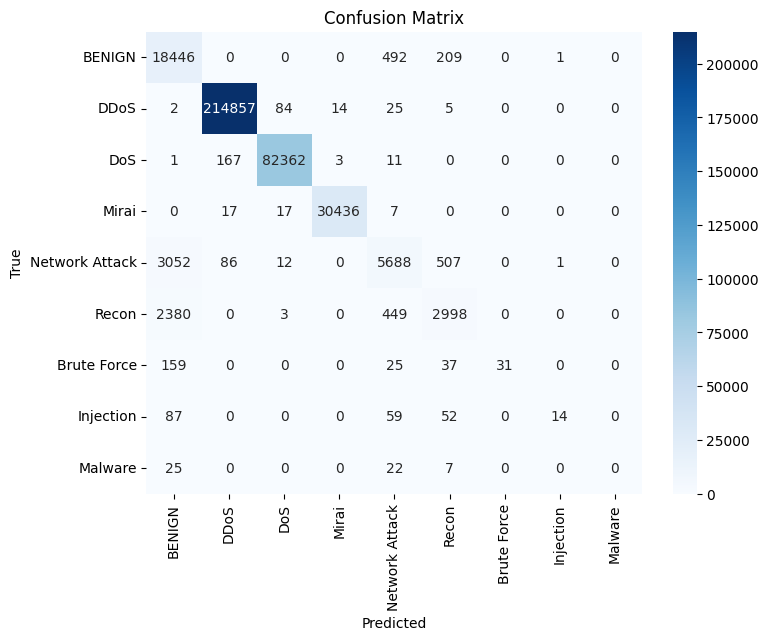

In [18]:
# Membuat confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)

# Membuat plot confusion matrix menggunakan seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=label_map.keys(), yticklabels=label_map.keys())
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
